# WSI LAB03 Algorytm minimax

### Miłosz Cieśla 325154 <br>

## Cele eksperymentów: 
- Przetestowanie działania algorytmu miniMax
- Porównanie jakości ruchów dla różnych głębokości przeszukiwania

## Decyzje projektowe:
- Stworzyłem klasę node aby zapewnić uniwersalność algorytmu minimax
- Jako moją heurystykę przyjąłem punktacje zależną od ilości nieprzerwanych pozycji zajętych przez gracza na planszy, które mają potencjał prowadzenia do wygranej.
- Losowanie ruchu następuje w linii zwracania wartości funkcji.


## Sprawdzenie działania algorytmu
W celu sprawdzenia implementacji utworzyłem symulację 1000 rozgrywek. <br>
Graczem pierwszym będzie nasz algorytm, natomiast gracz drugi będzie wykonywał losowo wybrane ruchy.

### Potrzebne importy

In [2]:
from testingFunctions import simulateMultipleGames, analyzeMovesQuality, pltMoveValues
from tabulate import tabulate

In [5]:
p1, p2, draws = simulateMultipleGames(1000, [False, 3, 0, 20], [True, 3, 0, 20])
data = [["Player 1", p1], 
        ["Player 2", p2], 
        ["Draws", draws]]
columns = ["Game winner", "How many times"]
print(tabulate(data, headers=columns, tablefmt="fancy_grid"))

╒═══════════════╤══════════════════╕
│ Game winner   │   How many times │
╞═══════════════╪══════════════════╡
│ Player 1      │              973 │
├───────────────┼──────────────────┤
│ Player 2      │               27 │
├───────────────┼──────────────────┤
│ Draws         │                0 │
╘═══════════════╧══════════════════╛


## Badanie wpływu głębi przeszukiwań na jakość ruchów

In [8]:
game = simulateMultipleGames(100, [False, 1, 0, 30], [True])
game2 = simulateMultipleGames(100, [False, 2, 0, 30], [True])
game3 = simulateMultipleGames(100, [False, 3, 0, 30], [True])
game4 = simulateMultipleGames(100, [False, 4, 0, 30], [True])
game5 = simulateMultipleGames(100, [False, 5, 0, 30], [True])

In [10]:
data = [[1, game[0], game[1], game[2]],
        [2, game2[0], game2[1], game2[2]],
        [3, game3[0], game3[1], game3[2]],
        [4, game4[0], game4[1], game4[2]],
        [5, game5[0], game5[1], game5[2]]]
columns = ["P1 Depth", "P1 Wins", "P2 Wins", "Draws"]
print(tabulate(data, headers=columns, tablefmt="fancy_grid"))

╒════════════╤═══════════╤═══════════╤═════════╕
│   P1 Depth │   P1 Wins │   P2 Wins │   Draws │
╞════════════╪═══════════╪═══════════╪═════════╡
│          1 │       100 │         0 │       0 │
├────────────┼───────────┼───────────┼─────────┤
│          2 │        98 │         2 │       0 │
├────────────┼───────────┼───────────┼─────────┤
│          3 │        99 │         1 │       0 │
├────────────┼───────────┼───────────┼─────────┤
│          4 │        96 │         4 │       0 │
├────────────┼───────────┼───────────┼─────────┤
│          5 │       100 │         0 │       0 │
╘════════════╧═══════════╧═══════════╧═════════╛


Przy interpretacji wyników należy pamiętać o tym, że gracz 1 ma przewagę ponieważ zaczyna rozgrywkę. Poniżej załączam eksperyment który to pokazuje.

In [7]:
p1, p2, draws = simulateMultipleGames(1000, [False, 3, 0, 20], [False, 3, 0, 20])
data = [["Player 1", p1], 
        ["Player 2", p2], 
        ["Draws", draws]]
columns = ["Game winner", "How many times"]
print(tabulate(data, headers=columns, tablefmt="fancy_grid"))

╒═══════════════╤══════════════════╕
│ Game winner   │   How many times │
╞═══════════════╪══════════════════╡
│ Player 1      │              527 │
├───────────────┼──────────────────┤
│ Player 2      │              469 │
├───────────────┼──────────────────┤
│ Draws         │                4 │
╘═══════════════╧══════════════════╛


### Przebieg wartości zwracanych przez funkcje podczas rozgrywki

Do tego eksperymentu używamy symulacji rozgrywki w której przeciwko sobie grają 2 algorytmy o takim samym parametrze głębi przeszukiwań.
Dla każdego ruchu gracza 1 oprócz minimax zwracającego ruch który ma się wykonać, działają dodatkowo algorytmy minimax pokazujące jakiej jakości ruch zostałby znaleziony w przypadku wybrania innej głębi.

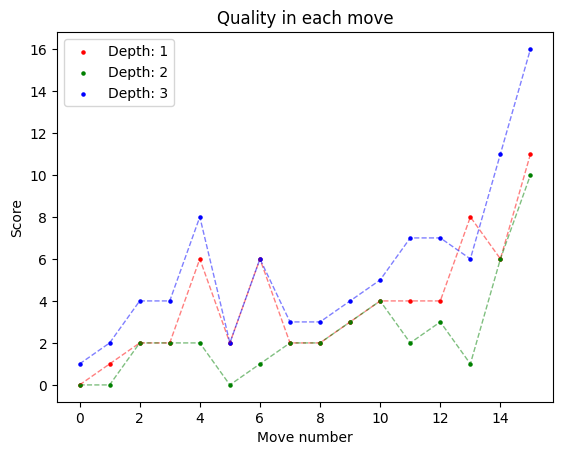

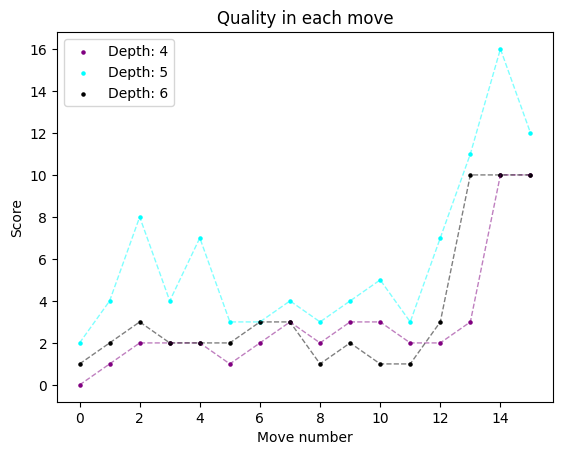

In [5]:
colors = ['red', 'green', 'blue', 'purple', 'cyan', 'black']
moveValues = analyzeMovesQuality(6)
pltMoveValues(moveValues[:3], colors, "Quality in each move", True)
pltMoveValues(moveValues[3:], colors[3:], "Quality in each move", True, 3)